In [21]:
import os
import numpy as np
import mahotas as mh
import glob
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt

In [22]:
training_data = []
labels_data = []
CATEGORIES = ['Mountain','Sea']
local_path = "C:/Users/NRRU/Desktop/python/imgs/"
clf = Pipeline([('preproc', StandardScaler()),('classifier',LogisticRegression(solver='lbfgs'))])
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(local_path,category)
        print(path)
        class_num = category
        for img in os.listdir(path):
            try:
                fname = os.path.join(path,img)
#                 print(fname)
                img = mh.imread(fname) 
                img = mh.colors.rgb2gray(img, dtype=np.uint8) 
                ft = mh.features.haralick(img).ravel()
#                 print(ft)
                training_data.append(ft)
#                 print(class_num)
                labels_data.append(class_num)
            except Exception as e:
                pass    
    features = np.array(training_data)
    labels = np.array(labels_data) 
    clf.fit(features,labels)

def predict(im):
    _img = mh.imread(im)
    img = mh.colors.rgb2gray(_img, dtype=np.uint8)
    test_feature = mh.features.haralick(img).ravel()
    print ("ทำนายว่าเป็นภาพ : %s"%clf.predict([test_feature])[0])
    plt.imshow(_img)

create_training_data()

C:/Users/NRRU/Desktop/python/imgs/Mountain
C:/Users/NRRU/Desktop/python/imgs/Sea


ทำนายว่าเป็นภาพ : Sea


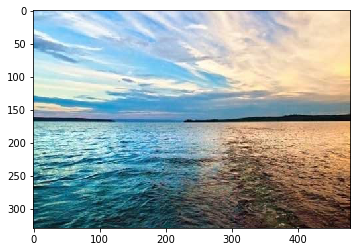

In [35]:
predict("C:/Users/NRRU/Desktop/python/test/test6.jpg")